In [1]:
import sympy as sp
sp.init_printing()

# 03_StellarDynamics_HW_Chap06 

# Question (1) Low Surface Density Part

In [2]:
# initialize the symbols
kappa, kappa_0, P, T, F_rad, F_conv, a, b, mu = sp.symbols(
    'kappa kappa_0 P T F_rad F_conv a b mu')

In [3]:
# kappa for opacity
exprK = sp.Eq(kappa, kappa_0 * P**a * T**b)
exprK

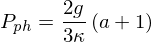

In [4]:
# eq (6.121), pressure for photosphere with optical depth = 3/2
eqPh = sp.Eq(sp.simplify('P_ph'), 
             sp.simplify('2/3 * (1+a) * g / (kappa)'))
eqPh

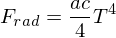

In [5]:
# approx expression for F_rad in (6.123)
exprFr = sp.Eq(F_rad, sp.simplify('a * c / 4 * T^4'))
exprFr

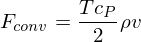

In [6]:
# (6.124)
exprFc = sp.Eq(F_conv, sp.simplify('1/2 * rho * c_P * v * T'))
exprFc

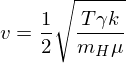

In [7]:
# approx the radial-velocity fluctuation 
v = sp.Symbol('v')
gamma = sp.Symbol('gamma')
exprV = sp.simplify('1 / 2 * ((r * k * T)/(mu * m_H))^(1/2)').subs(
    sp.sympify('r'), gamma)
sp.Eq(v, exprV)

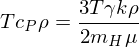

In [8]:
# (6.126) approx ρcT to internal energy
exprInternal = sp.simplify('3 / 2 * rho * (k * T / mu/ m_H)') * gamma 
eqInternal = sp.Eq(sp.simplify('rho * c_P * T'), exprInternal)
eqInternal

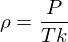

In [9]:
# ideal gas law
eqIdeal = sp.Eq(P, sp.simplify('rho * k * T'))
eqIdeal = sp.solve(eqIdeal, sp.simplify('rho'))[0]
sp.Eq(sp.simplify('rho'), eqIdeal)

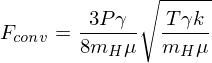

In [10]:
# substitute (6.124)
exprFc = exprFc.subs(
    eqInternal.lhs, eqInternal.rhs).subs(
    v, exprV).subs(sp.simplify('rho'), eqIdeal)
exprFc
# This is eq (6.127)

In [11]:
# for energy conservation, the radiative flux which enters the
# sphere shold equals to the convective flux leaving the 
# stellar interior
sp.Eq(exprFc.lhs, exprFr.lhs)

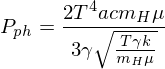

In [12]:
# So we have
eqFcFr = sp.Eq(exprFc.rhs, exprFr.rhs)
eqP = sp.Eq(sp.simplify('P_ph'), sp.solve(eqFcFr, P)[0])
eqP

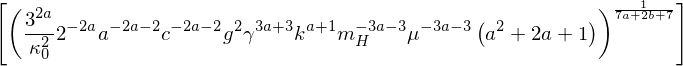

In [13]:
# So, the effective temperature for the fully convective star
# in low surface density is
## here we substitute kappa and P_ph
eqP = eqP.subs(eqPh.lhs, eqPh.rhs).subs(exprK.lhs, exprK.rhs).subs(P, eqP.rhs)

## here we symbolically solve for T
sp.solve(eqP, T)

The above solution is awful.  
But we can roughly see that the exponents of, e.g., $\kappa_0$ is the same as `eq (6.129)`.  
There is come inconsistent between above solution and `eq (6.129)`. However, since `eq. (6.129)` is just a approximation, let's just take the approximation made by the textbook.

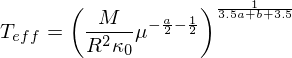

In [14]:
# eq (6.129), effective temperature T for low surface density
eqTeff = sp.Eq(sp.simplify('T_eff'), 
    sp.simplify('(M / mu^((a+1)/2) / kappa_0 / R^2)^(1/(b+3.5*(1+a)))'))
eqTeff

- Population 1

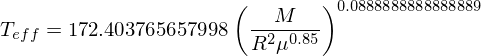

In [15]:
# Population I effective temperature 
eqTeff.subs(a, 0.7).subs(b, 5.3).subs(kappa_0, 6.9*10**-26)

- Population 2

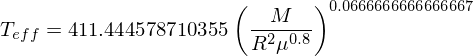

In [16]:
# Population II effective temperature 
eqTeff.subs(a, 0.6).subs(b, 9.4).subs(kappa_0, 6.1*10**-40)

# Question (2) Low Surface Density Part

In [17]:
eqL = sp.Eq(sp.simplify('L'), 
            sp.simplify('4 * pi * sigma * R^2 * T_eff^4'))
# equaiton of luminosity 
eqL = sp.Eq(sp.simplify('L'), 
            sp.simplify('4 * pi * sigma * R^2 * T_eff^4'))
eqL

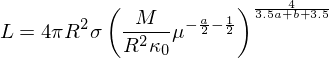

In [18]:
# substitute for effective temperature
eqL = eqL.subs(eqTeff.lhs, eqTeff.rhs)
eqL

- Population 1

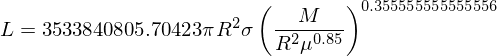

In [19]:
# Population I luminosity
eqL.subs(a, 0.7).subs(b, 5.3).subs(kappa_0, 6.9*10**-26)

- Population 2

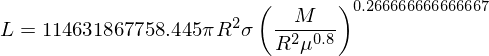

In [20]:
# Population II luminosity
eqL.subs(a, 0.6).subs(b, 9.4).subs(kappa_0, 6.1*10**-40)

# Question (1) High Surface Density Part

For high surface density, the convective transport is efficient. The temperature gradient is adiabatic. So we may have...

$$
P \propto \rho^{\gamma} \propto \rho T
$$
$$
P \propto T^{\gamma / (\gamma - 1)}
$$

In [21]:
K = sp.Symbol('K')
eqAdiabatic = sp.Eq(P, K * T**(gamma/(gamma-1)))
eqAdiabatic

So, we would have the relation between $P_{ph}$ and $P_{c}$

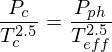

In [22]:
Pc, Tc = sp.symbols('P_c T_c')
P_ph, T_eff = sp.symbols('P_ph T_eff')
eqAdiabaticHigh = sp.Eq(
    eqAdiabatic.subs(P, Pc).lhs / eqAdiabatic.subs(T, Tc).rhs * K, 
    eqAdiabatic.subs(P, P_ph).lhs / eqAdiabatic.subs(T, T_eff).rhs * K
     ).subs(gamma, 5/3)
eqAdiabaticHigh

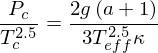

In [23]:
# P_ph Substitute with (6.121) 
eqHighSurface = eqAdiabaticHigh.subs(P_ph, eqPh.rhs)
eqHighSurface

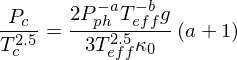

In [24]:
# substitute kappa 
eqHighSurface = eqHighSurface.subs(kappa, exprK.rhs).subs(T, T_eff).subs(P, P_ph)
eqHighSurface

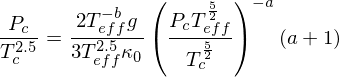

In [25]:
# it is awuful that I need to replace P_ph with Pc/Tc again 
eqHighSurface = eqHighSurface.subs(P_ph, 
    sp.solve(eqAdiabaticHigh, P_ph)[0])
eqHighSurface

不太確定為什麼課本不給一下 core 的 profile ，
但是老闕上課好像有給。

$$
\frac{P_c}{T_c^{2.5}} \propto M^{-0.5} R^{1.5}
$$

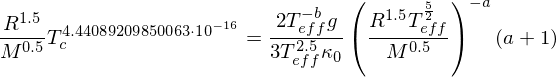

In [26]:
# substitute core profile with above relation provided by 老闕
M, R = sp.symbols('M R')
eqHighSurface = eqHighSurface.subs(Pc, M**-0.5 * R**1.5 * Tc**2.5)
eqHighSurface

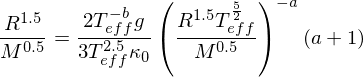

In [27]:
# it seems Tc should have zero exponent, 
eqHighSurface = eqHighSurface.subs(Tc, 1)
eqHighSurface

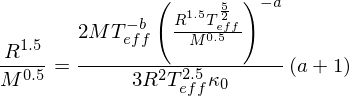

In [28]:
## subsitute for g = M / R^2
g = sp.Symbol('g')
eqHighSurface = eqHighSurface.subs(g, sp.simplify('M / R^2'))
eqHighSurface

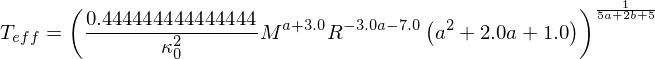

In [29]:
## solve for T_eff
eqHighSurface = sp.Eq(T_eff, sp.solve(eqHighSurface, T_eff)[0])
eqHighSurface

- Population 1

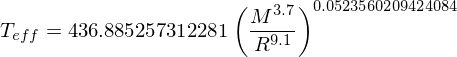

In [30]:
# Population 1 effective temperature 
eqHighSurface.subs(
    a, 0.7).subs(b, 5.3).subs(kappa_0, 6.9*10**-26)

這個結果也太好笑了XD  不知道為什麼程式不把指數項爆開，但是我們可以試著幫他算一下：

- exponent of M : 3.7 * 0.0523 = 0.1935, the same as (6.135)
- exponent of R : 9.1 * 0.0523 = 0.4759, not the same as (6.135)

R 的指數是錯的，有可能老闕給的那條式子是錯的或者我用錯地方，但是 M 的指數是對的

- Population 2

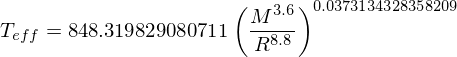

In [31]:
# Populatoin II effective temperature 
eqHighSurface.subs(
    a, 0.6).subs(b, 9.4).subs(kappa_0, 6.1*10**-40)

這次是兩個都錯了。好像不是很確定哪裡算錯了。

# Question (2) High Surface Density Part


In [32]:
# eq of luminosity
eqLHighSurface = sp.Eq(
    sp.simplify('L'), sp.simplify('4 * pi * sigma * R^2 * T_eff^4'))
eqLHighSurface

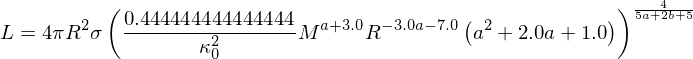

In [33]:
eqLHighSurface = eqLHighSurface.subs(T_eff, eqHighSurface.rhs)
eqLHighSurface

- Population 1

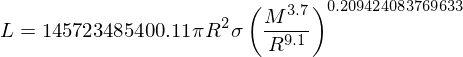

In [34]:
# population I luminosity
eqLHighSurface.subs(
    a, 0.7).subs(b, 5.3).subs(kappa_0, 6.9*10**-26)

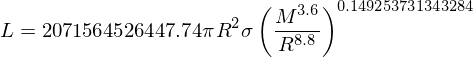

In [35]:
# population II luminosity
eqLHighSurface.subs(
    a, 0.6).subs(b, 9.4).subs(kappa_0, 6.1*10**-40)

# Question (1) Ionization Zones
課本這邊寫得看不太懂，不過大概是叫我們硬解吧。

Use the same adiabatic condition.  

In [36]:
eqAdiabatic

The textbook says that the ionization zone is convective and the entropy across it is constant. So that $S(x=1) - S(x=0) = 0$, where x denotes the fraction of hydrogen ionized.

Also, argued in the textbook, 
- x = 1 : the center of the star
- x = 0 : at the base of the photosphere

Yeah ... so, basically we would have 

$$
S(x=1, P=P_c) = S(x=0, P=P_{ph})
$$

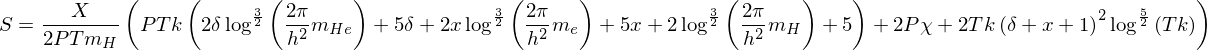

In [37]:
# entropy per unit mass
exprEntropy = sp.simplify(
    '''
    X * k / m_H * 
    (5 / 2 * (1 + x + delta) + 
    chi / k / T + 
    ln(2 * pi * m_H / h^2)^(3/2) + 
    delta * ln(2 * pi * m_He / h^2)^(3/2) + 
    x * ln(2 * pi * m_e / h^2)^(3/2) + 
    (1 + x + delta) * ln(k * T)^(5/2) * (1 + x + delta) / P)
    ''')
S = sp.Symbol('S')
epEntropy = sp.Eq(S, exprEntropy)
epEntropy
# lol this is ugly

Get the relation here,  
$$
S(x=1, P=P_c) = S(x=0, P=P_{ph})
$$

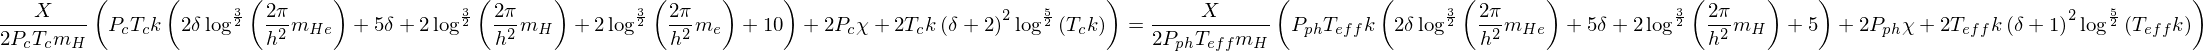

In [38]:
# S(x=1, P=P_c) = S(x=0, P=P_{ph})
x, delta = sp.symbols('x delta')
eqBoundary = sp.Eq(epEntropy.subs(x, 1).subs(P, Pc).subs(T, Tc).rhs, 
    epEntropy.subs(x, 0).subs(P, P_ph).subs(T, T_eff).rhs)

eqBoundary
# lol 超級複雜，用手算會瘋掉

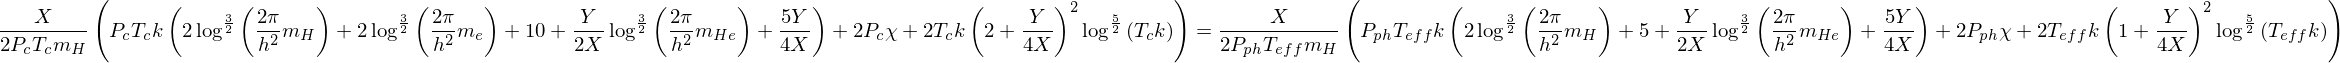

In [39]:
# substitute delta = Y / (4 X)
eqBoundary = eqBoundary.subs(delta, sp.simplify('Y / (4 * X)'))
eqBoundary

And then, substitute with $$
\frac{P_c}{T_c^{2.5}} \propto M^{-0.5} R^{1.5}
$$

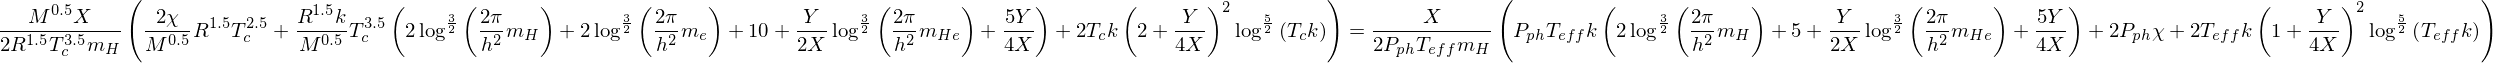

In [40]:
eqBoundary = eqBoundary.subs(Pc, M**-0.5 * R**1.5 * Tc**2.5)
eqBoundary

天啊，感覺 $T_c$ 是消不掉的。用 `simplify` 來試試看好了。

註： `simplify` 是 `sympy` 用來簡化方程式的懶人指令，他自動會幫你跑他自己覺得比較簡化的結果。

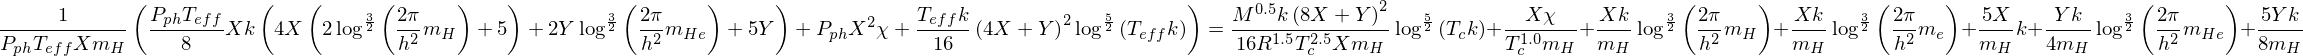

In [41]:
eqBoundary = sp.simplify(eqBoundary)
eqBoundary

都做到這裡了也只能硬著頭皮做下去了：

- 用 (6.121) 替代掉 $P_{ph}$
- 替代掉 $\kappa$
- 再用 adiabatic equation 替代掉 多餘的 $P_{ph}$，留下$T_{eff}$ 可解

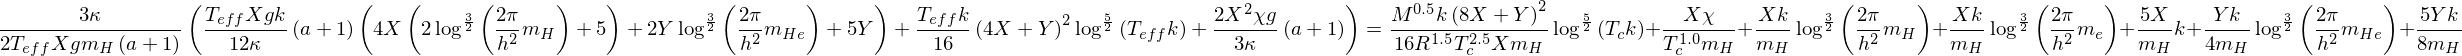

In [42]:
# 用 (6.121)
eqBoundary = eqBoundary.subs(P_ph, eqPh.rhs)
eqBoundary

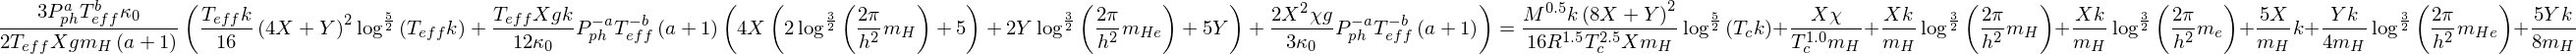

In [43]:
# 換掉 kappa
eqBoundary = eqBoundary.subs(kappa, exprK.rhs.subs(P, P_ph).subs(T, T_eff))
eqBoundary

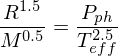

In [44]:
# adiabatic condition Pc / Tc^2.5 = P_ph / T_eff^2.5
# 但是這邊就直接把 Pc / Tc^2.5 換成  M^{-0.5} R^{1.5} 好了
eqAdiabaticHigh.subs(eqAdiabaticHigh.lhs, M**-0.5 * R**1.5)

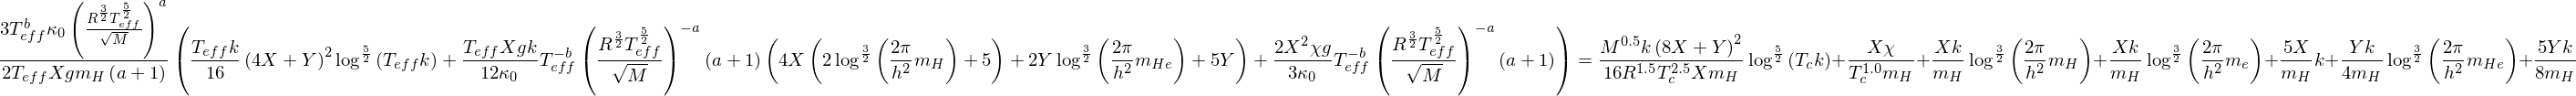

In [45]:
eqBoundary = eqBoundary.subs(
    P_ph,
    sp.solve(
        eqAdiabaticHigh.subs(eqAdiabaticHigh.lhs, M**-0.5 * R**1.5),
        P_ph
        )[0]
    )
eqBoundary

感覺是很嚴重的大失敗。  
但是還是讓他把答案寫完好了。

In [47]:
sp.solve(eqBoundary, T_eff)

最後是算不出來的⋯⋯

（投降）

# Question 3

C)Explain the mechanism of Hayashi track, why we can roughly disassemble the Hayashi track and what is the difference among the three states?(10%)

- 一開始可能是一坨氣體開始收縮，因為還沒有核反應，所以溫度超低，幾乎沒有輻射、都是對流在掌控溫度。這時的這星體可以說是在 Hayashi track 上的 protostar。  由於才剛開始收縮，表面密度就會比較低，而且又是個完全對流（fully-convective）的星體，所以可以用 6.5 節的low surface density 的 近似來做。這時的表面溫度會稍微提高、luminosity 會迅速降低。  
- 持續收縮之後，到了某種程度，表面密度變高了，這時就可以用 high surface density 來近似。溫度隨著收縮而降低一點點、luminosity 掉得更快了。  
- 但是到了某種程度之後，內部溫度夠高了，輻射開始比對流還要重要，內部形成了一個輻射核。這時就可以用 ionization zone 的近似來解釋。接著，開始越來越高溫，在 H-R 圖上明顯往左移，到了某種高溫程度後，點燃氫核融合。

抄錄自課本 171 頁。
